In [1]:
# Logistic regression model 

# Importing needed libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # Split dataset into train and test data
from sklearn.metrics import accuracy_score # Find the accuracy of trained model
from sklearn.preprocessing import StandardScaler # Removes the mean and scales each feature/variable to unit variance.
import seaborn as sns # For data visualization

In [2]:
# Implementation of Logistic Regression
class LogisiticRegression():
    
    # Function to initialize learning rate, epochs, weights and bias
    def __init__(self, learning_rate = 0.5, epochs = 100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        
    # Fit function to train model using logistic regression 
    def fit(self, X, Y):
        self.no_ex,self.no_features = X.shape
        self.weights = np.zeros(self.no_features)
        self.bias = 0
        self.X = X
        self.Y = Y
        
        for i in range(self.epochs):
            self.update_weights()
            
    # To update the weights
    def update_weights(self):
        # Main formula
        Y_hat = 1 / (1 + np.exp(-(self.X.dot(self.weights) + self.bias)))
        
        # Gradient decent
        dw = (1 / self.no_ex) * np.dot(self.X.T,(Y_hat - self.Y))
        db = (1 / self.no_ex) * np.sum(Y_hat - self.Y)
        
        self.weights -= self.lr * dw
        self.bias -= self.lr * db
    
    # Predict function to predict values from trained model
    def predict(self, X):
        Y_pred = 1 /(1 + np.exp(-(X.dot(self.weights) + self.bias)))
        Y_pred = np.where( Y_pred > 0.5,1,0)
        return Y_pred

In [3]:
# Reading dataset csv file
data = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<Axes: >

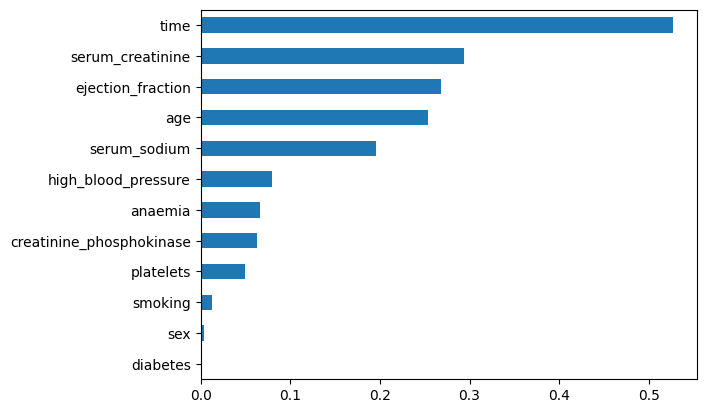

In [5]:
# Data visualization
corr_arr = []
name_arr = []

for col in range(len(data.columns)):
    if data.columns[col] == "DEATH_EVENT":
        continue

    name_arr.append(data.columns[col])

    corr = data.corr()["DEATH_EVENT"][col]
    if corr < 0: corr *= -1
    corr_arr.append(corr)

pd.Series(corr_arr, name_arr).sort_values().plot(kind="barh")

In [6]:
# Specifying Train features Target feature
features = data.drop('DEATH_EVENT',axis=1)
target = data['DEATH_EVENT']

In [7]:
scaler =  StandardScaler()
scaler.fit(features)

chngd_data = scaler.transform(features)

features = chngd_data
target = data['DEATH_EVENT']

In [8]:
# Spliting data into training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(features, target, test_size = 0.75,random_state = 2) 

In [9]:
# Making instance of linear regression
object1 = LogisiticRegression()

# Fit function to train model
object1.fit(X_train,Y_train)
# Making actual prediction
prediction = object1.predict(X_test)

In [10]:
# Finding model accuracy
accuracy = round(accuracy_score(Y_test,prediction) * 100, 2)
print("Accuracy : ", accuracy)

Accuracy :  85.33
